In [1]:
##Importing the libraries
import pandas as pd     
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
##Loading the data into the variable df 
df=pd.read_csv(r'C:\Users\anirudh\Downloads\H2HBABBA2963.csv',error_bad_lines=False)

## Data Preprocessing

In [4]:
##It shows the number of columns and rows
df.shape

(50000, 19)

In [5]:
##Showing the first 5 records of the data
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200792734,MDV/ us,NaN,2020.0,1.930704e+09,2020-03-26,20200326,20200326,20200410.0,USD,RV,1.0,NaN,3097.00,20200326.0,NAA8,1.930704e+09,1
1,U001,0100044041,DEF. F,2019-08-01 00:00:00,2019.0,1.929635e+09,2019-07-19,20190719,20190719,20190808.0,USD,RV,1.0,NaN,1899.56,20190716.0,NAM4,1.929635e+09,0
2,U001,0200769623,WAL-MAR us,2019-03-19 00:00:00,2019.0,1.928929e+09,2019-03-08,20190308,20190308,20190323.0,USD,RV,1.0,NaN,1084.23,20190308.0,NAH4,1.928929e+09,0
3,U001,0200744019,TARG in,2019-12-31 00:00:00,2019.0,1.930288e+09,2019-12-17,20191217,20191217,20200101.0,USD,RV,1.0,NaN,12630.28,20191217.0,NAA8,1.930288e+09,0
4,U001,0200769623,WAL-MAR llc,2020-01-30 00:00:00,2020.0,1.930413e+09,2020-01-19,20200118,20200119,20200203.0,USD,RV,1.0,NaN,14148.33,20200119.0,NAH4,1.930413e+09,0


In [6]:
##Checking the null values in the data
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [7]:
##Droping the column 'area_business' as all the values of ths column are null
df.drop('area_business',axis=1, inplace=True)

In [8]:
##Droping the null values of invoice_id as it is the primary key of our data, so having null values in it is of no use
df.dropna(subset=['invoice_id'],inplace=True)

In [9]:
##Checking the values of doc_id and invoice_id
all(np.array(df["doc_id"])==np.array(df["invoice_id"]))

True

In [10]:
##Droping the column 'doc_id' as it has the values as same as that of the column 'invoice_id'
df.drop('doc_id', axis=1, inplace=True)

In [11]:
##Droping the column 'document_create_date.1' as it has the values as same as that of the column 'posting_date'
df.drop('document_create_date.1', axis=1, inplace=True)

In [12]:
##Checking the null values in the data
df.isnull().sum()

business_code               0
cust_number                 0
name_customer               0
clear_date              10000
buisness_year               0
posting_date                0
document_create_date        0
due_in_date                 0
invoice_currency            0
document type               0
posting_id                  0
total_open_amount           0
baseline_create_date        0
cust_payment_terms          0
invoice_id                  0
isOpen                      0
dtype: int64

In [13]:
##Checking the duplicated values in the column 'invoice_id'
df.invoice_id.duplicated().sum()

1144

In [14]:
##Droping the duplicate values from column 'invoice_id' as it is the primary key
df.drop_duplicates(subset ="invoice_id",keep = 'first', inplace = True) 

In [15]:
##Restting the index 
df=df.reset_index(drop=True)

In [16]:
##Finding the unique values of the dataset
df.nunique()

business_code               6
cust_number              1428
name_customer            4184
clear_date                399
buisness_year               2
posting_date              505
document_create_date      508
due_in_date               547
invoice_currency            2
document type               1
posting_id                  1
total_open_amount       44248
baseline_create_date      508
cust_payment_terms         76
invoice_id              48850
isOpen                      2
dtype: int64

In [17]:
##Droping the column 'document type' as all the values of ths column are same.
df.drop('document type',axis=1, inplace=True)

In [18]:
##Droping the column 'posting_id' as all the values of ths column are same.
df.drop('posting_id',axis=1, inplace=True)

In [19]:
##Showing thw database
df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200792734,MDV/ us,NaN,2020.0,2020-03-26,20200326,20200410.0,USD,3097.00,20200326.0,NAA8,1.930704e+09,1
1,U001,0100044041,DEF. F,2019-08-01 00:00:00,2019.0,2019-07-19,20190719,20190808.0,USD,1899.56,20190716.0,NAM4,1.929635e+09,0
2,U001,0200769623,WAL-MAR us,2019-03-19 00:00:00,2019.0,2019-03-08,20190308,20190323.0,USD,1084.23,20190308.0,NAH4,1.928929e+09,0
3,U001,0200744019,TARG in,2019-12-31 00:00:00,2019.0,2019-12-17,20191217,20200101.0,USD,12630.28,20191217.0,NAA8,1.930288e+09,0
4,U001,0200769623,WAL-MAR llc,2020-01-30 00:00:00,2020.0,2020-01-19,20200118,20200203.0,USD,14148.33,20200119.0,NAH4,1.930413e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48845,CA02,0140104440,SO systems,2019-08-21 00:00:00,2019.0,2019-08-04,20190804,20190818.0,CAD,25747.85,20190808.0,CA10,2.960571e+09,0
48846,U001,0200769623,WAL-MAR us,2019-05-21 00:00:00,2019.0,2019-05-10,20190510,20190525.0,USD,16916.49,20190510.0,NAH4,1.929289e+09,0
48847,U001,0200769623,WAL-MAR corporation,2019-05-09 00:00:00,2019.0,2019-04-29,20190428,20190514.0,USD,66872.68,20190429.0,NAH4,1.929221e+09,0
48848,U001,0200790107,ROU llc,2019-09-27 00:00:00,2019.0,2019-09-12,20190912,20190927.0,USD,45620.01,20190912.0,NAC6,1.929868e+09,0


In [20]:
##Checking the data types of each column
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
posting_date             object
document_create_date      int64
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
invoice_id              float64
isOpen                    int64
dtype: object

In [21]:
##Converting the datatype of this column into date-time datatype
df['clear_date']=pd.to_datetime(df.clear_date)

In [22]:
##Converting the datatype of this column into date-time datatype
df['posting_date']=pd.to_datetime(df['posting_date'])

In [23]:
##Converting the datatype of this column into date-time datatype
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d')

In [24]:
##Converting the datatype of this column into date-time datatype
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')

In [25]:
##Converting the datatype of this column into date-time datatype
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')

In [26]:
##Showing thw database
df

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200792734,MDV/ us,NaT,2020.0,2020-03-26,2020-03-26,2020-04-10,USD,3097.00,2020-03-26,NAA8,1.930704e+09,1
1,U001,0100044041,DEF. F,2019-08-01,2019.0,2019-07-19,2019-07-19,2019-08-08,USD,1899.56,2019-07-16,NAM4,1.929635e+09,0
2,U001,0200769623,WAL-MAR us,2019-03-19,2019.0,2019-03-08,2019-03-08,2019-03-23,USD,1084.23,2019-03-08,NAH4,1.928929e+09,0
3,U001,0200744019,TARG in,2019-12-31,2019.0,2019-12-17,2019-12-17,2020-01-01,USD,12630.28,2019-12-17,NAA8,1.930288e+09,0
4,U001,0200769623,WAL-MAR llc,2020-01-30,2020.0,2020-01-19,2020-01-18,2020-02-03,USD,14148.33,2020-01-19,NAH4,1.930413e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48845,CA02,0140104440,SO systems,2019-08-21,2019.0,2019-08-04,2019-08-04,2019-08-18,CAD,25747.85,2019-08-08,CA10,2.960571e+09,0
48846,U001,0200769623,WAL-MAR us,2019-05-21,2019.0,2019-05-10,2019-05-10,2019-05-25,USD,16916.49,2019-05-10,NAH4,1.929289e+09,0
48847,U001,0200769623,WAL-MAR corporation,2019-05-09,2019.0,2019-04-29,2019-04-28,2019-05-14,USD,66872.68,2019-04-29,NAH4,1.929221e+09,0
48848,U001,0200790107,ROU llc,2019-09-27,2019.0,2019-09-12,2019-09-12,2019-09-27,USD,45620.01,2019-09-12,NAC6,1.929868e+09,0


In [27]:
##Checking the data types of each column
df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

## Spliiting the data based on the clear_date, whether it is given or not

In [28]:
##Splitting the Data into Train dataset where "isopen=0" means "cleardate" is given.
td = df.loc[df['isOpen'] == 0]     
train_data = pd.DataFrame(td)
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0100044041,DEF. F,2019-08-01,2019.0,2019-07-19,2019-07-19,2019-08-08,USD,1899.56,2019-07-16,NAM4,1.929635e+09,0
2,U001,0200769623,WAL-MAR us,2019-03-19,2019.0,2019-03-08,2019-03-08,2019-03-23,USD,1084.23,2019-03-08,NAH4,1.928929e+09,0
3,U001,0200744019,TARG in,2019-12-31,2019.0,2019-12-17,2019-12-17,2020-01-01,USD,12630.28,2019-12-17,NAA8,1.930288e+09,0
4,U001,0200769623,WAL-MAR llc,2020-01-30,2020.0,2020-01-19,2020-01-18,2020-02-03,USD,14148.33,2020-01-19,NAH4,1.930413e+09,0
5,U001,0200736337,SYSCO F associates,2019-02-08,2019.0,2019-01-23,2019-01-22,2019-02-07,USD,21436.85,2019-01-23,NAA8,1.928660e+09,0


In [29]:
##Splitting the Data into Test dataset where "isopen=1" means "cleardate" is given or NULL.
td1 = df.loc[df['isOpen'] == 1]    
test_data = pd.DataFrame(td1)
test_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200792734,MDV/ us,NaT,2020.0,2020-03-26,2020-03-26,2020-04-10,USD,3097.00,2020-03-26,NAA8,1.930704e+09,1
8,U001,0200738884,US systems,NaT,2020.0,2020-02-27,2020-02-24,2020-03-13,USD,11622.94,2020-02-27,NAA8,1.930560e+09,1
10,U001,0200762301,C&S WH corporation,NaT,2020.0,2020-03-30,2020-03-29,2020-04-14,USD,9563.15,2020-03-30,NAC6,1.930719e+09,1
15,U001,0200707005,KING S corp,NaT,2020.0,2020-03-21,2020-03-19,2020-04-05,USD,142020.91,2020-03-21,NAA8,1.930672e+09,1
17,U001,0200772670,ASSOCIAT associates,NaT,2020.0,2020-04-03,2020-04-02,2020-04-18,USD,9098.65,2020-04-03,NAU5,1.930732e+09,1


## Splitting of data into train, validation and test dataset.

In [30]:
##Finding the delay, which is 'clear_date' - 'due_in_date' and adding an extra Feature in oue database.
train_data['delay'] =  train_data['clear_date'] - train_data['due_in_date']    
train_data['delay']=train_data['delay'].dt.days
train_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
1,U001,0100044041,DEF. F,2019-08-01,2019.0,2019-07-19,2019-07-19,2019-08-08,USD,1899.56,2019-07-16,NAM4,1.929635e+09,0,-7
2,U001,0200769623,WAL-MAR us,2019-03-19,2019.0,2019-03-08,2019-03-08,2019-03-23,USD,1084.23,2019-03-08,NAH4,1.928929e+09,0,-4
3,U001,0200744019,TARG in,2019-12-31,2019.0,2019-12-17,2019-12-17,2020-01-01,USD,12630.28,2019-12-17,NAA8,1.930288e+09,0,-1
4,U001,0200769623,WAL-MAR llc,2020-01-30,2020.0,2020-01-19,2020-01-18,2020-02-03,USD,14148.33,2020-01-19,NAH4,1.930413e+09,0,-4
5,U001,0200736337,SYSCO F associates,2019-02-08,2019.0,2019-01-23,2019-01-22,2019-02-07,USD,21436.85,2019-01-23,NAA8,1.928660e+09,0,1


In [31]:
##It will check the outliers and remove these and the kept the value as 3, so that no useful information fet deleted from the data.
Q1 = train_data['delay'].quantile(0.25)
Q3 = train_data['delay'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (train_data['delay'] >= Q1 - 3 * IQR) & (train_data['delay'] <= Q3 + 3 *IQR)
train_data=train_data.loc[filter]

In [32]:
##Sorting the data according to the column 'posting_date'
train_data.sort_values("posting_date",ascending=True)

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
5955,U001,0200726979,BJ'S corporation,2019-01-15,2019.0,2018-12-30,2018-12-29,2019-01-14,USD,185.10,2018-12-30,NAA8,1.928542e+09,0,1
23212,U001,0200769623,WAL-MAR trust,2019-01-10,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,39683.91,2018-12-30,NAH4,1.928544e+09,0,-4
15902,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,USD,4397.29,2018-12-30,NAH4,1.928540e+09,0,-5
1814,U001,0200769623,WAL-MAR corp,2019-01-09,2019.0,2018-12-30,2018-12-29,2019-01-14,USD,3748.84,2018-12-30,NAH4,1.928537e+09,0,-5
4383,U001,0200466603,SMITH'S llc,2019-01-14,2019.0,2018-12-30,2018-12-29,2019-01-14,USD,12624.05,2018-12-30,NAA8,1.928540e+09,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30898,U001,0200705742,DOT in,2020-03-12,2020.0,2020-02-26,2020-02-26,2020-03-17,USD,25911.91,2020-02-26,NAD1,1.930572e+09,0,-5
45926,U001,0100001196,DOLLAR corp,2020-03-16,2020.0,2020-02-26,2020-02-25,2020-03-12,USD,15818.32,2020-02-26,NAA8,1.930567e+09,0,4
22772,U001,0200769623,WAL-MAR corporation,2020-03-09,2020.0,2020-02-26,2020-02-26,2020-03-12,USD,45298.19,2020-02-26,NAH4,1.930571e+09,0,-3
14383,U001,0200759878,SA systems,2020-03-13,2020.0,2020-02-27,2020-02-26,2020-03-13,USD,63966.18,2020-02-27,NAH4,1.930574e+09,0,0


In [33]:
##Dividing the data into dependent variables and independent variable
X=train_data.drop(['delay'],axis=1)
y=train_data['delay']

In [34]:
##Dividing the data into train, validation and test set
X_train,X_join,y_train,y_join=train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)
X_val,X_test,y_val,y_test=train_test_split(X_join,y_join,test_size=0.5,random_state=0,shuffle=False)

In [35]:
X_train.shape, X_val.shape, X_test.shape

((26145, 14), (5602, 14), (5603, 14))

## Expolatory Data Analysis (EDA) 

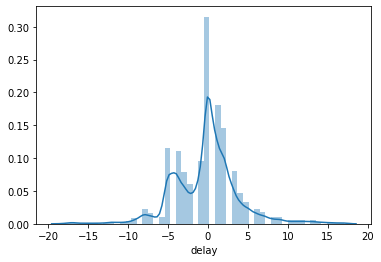

In [36]:
##Plotting the distribution plot
sns.distplot(y_train)

In [37]:
##Merging the y_train in X_train dataset
X_train.merge(y_train,on = X_train.index)

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,1,U001,0100044041,DEF. F,2019-08-01,2019.0,2019-07-19,2019-07-19,2019-08-08,USD,1899.56,2019-07-16,NAM4,1.929635e+09,0,-7
1,2,U001,0200769623,WAL-MAR us,2019-03-19,2019.0,2019-03-08,2019-03-08,2019-03-23,USD,1084.23,2019-03-08,NAH4,1.928929e+09,0,-4
2,3,U001,0200744019,TARG in,2019-12-31,2019.0,2019-12-17,2019-12-17,2020-01-01,USD,12630.28,2019-12-17,NAA8,1.930288e+09,0,-1
3,4,U001,0200769623,WAL-MAR llc,2020-01-30,2020.0,2020-01-19,2020-01-18,2020-02-03,USD,14148.33,2020-01-19,NAH4,1.930413e+09,0,-4
4,5,U001,0200736337,SYSCO F associates,2019-02-08,2019.0,2019-01-23,2019-01-22,2019-02-07,USD,21436.85,2019-01-23,NAA8,1.928660e+09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26140,34227,U001,0200078245,WOR associates,2019-11-08,2019.0,2019-10-23,2019-10-23,2019-11-07,USD,34059.20,2019-10-23,NAA8,1.930047e+09,0,1
26141,34229,U001,0200769623,WAL-MAR corporation,2020-02-26,2020.0,2020-02-15,2020-02-14,2020-03-01,USD,452.45,2020-02-15,NAH4,1.930526e+09,0,-4
26142,34230,U001,0200803720,DEC,2019-08-16,2019.0,2019-08-07,2019-08-07,2019-08-24,USD,1300.58,2019-08-01,NAM4,1.929716e+09,0,-8
26143,34231,U001,0200769623,WAL-MAR corporation,2019-10-01,2019.0,2019-09-21,2019-09-20,2019-10-06,USD,44667.24,2019-09-21,NAH4,1.929902e+09,0,-5


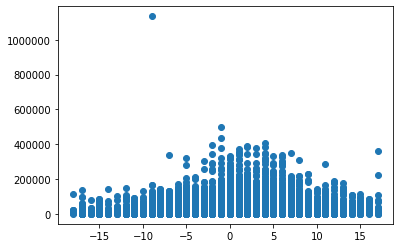

In [38]:
##Plotting the scatter plot between delay and total_open_amount
plt.scatter(X_train.merge(y_train,on = X_train.index)['delay'],X_train['total_open_amount'])

In [39]:
##Showing the X_train data
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0100044041,DEF. F,2019-08-01,2019.0,2019-07-19,2019-07-19,2019-08-08,USD,1899.56,2019-07-16,NAM4,1.929635e+09,0
2,U001,0200769623,WAL-MAR us,2019-03-19,2019.0,2019-03-08,2019-03-08,2019-03-23,USD,1084.23,2019-03-08,NAH4,1.928929e+09,0
3,U001,0200744019,TARG in,2019-12-31,2019.0,2019-12-17,2019-12-17,2020-01-01,USD,12630.28,2019-12-17,NAA8,1.930288e+09,0
4,U001,0200769623,WAL-MAR llc,2020-01-30,2020.0,2020-01-19,2020-01-18,2020-02-03,USD,14148.33,2020-01-19,NAH4,1.930413e+09,0
5,U001,0200736337,SYSCO F associates,2019-02-08,2019.0,2019-01-23,2019-01-22,2019-02-07,USD,21436.85,2019-01-23,NAA8,1.928660e+09,0


## Feature Engineering

In [40]:
##Adding some features like day, month and year of the posting_date,, day on ehich document created,, and the time period 
## between the creation of the document and working on it as bas_doc and the time period between the updating of the
## invoice in the system and working on it as bas_pos

In [41]:
##Adding features on train data.
X_train['bas_doc']=(X_train['baseline_create_date']-X_train['document_create_date']).dt.days
X_train['bas_pos']=(X_train['baseline_create_date']-X_train['posting_date']).dt.days
X_train['posting_date_year'] = X_train['posting_date'].dt.year
X_train['posting_date_month'] = X_train['posting_date'].dt.month
X_train['posting_date_day'] = X_train['posting_date'].dt.day
X_train['document_create_date_day'] = X_train['document_create_date'].dt.day


In [42]:
##Adding features on validation data.
X_val['bas_doc']=(X_val['baseline_create_date']-X_val['document_create_date']).dt.days
X_val['bas_pos']=(X_val['baseline_create_date']-X_val['posting_date']).dt.days
X_val['posting_date_year'] = X_val['posting_date'].dt.year
X_val['posting_date_month'] = X_val['posting_date'].dt.month
X_val['posting_date_day'] = X_val['posting_date'].dt.day
X_val['document_create_date_day'] = X_val['document_create_date'].dt.day


In [43]:
##Adding features on test data.
X_test['bas_doc']=(X_test['baseline_create_date']-X_test['document_create_date']).dt.days
X_test['bas_pos']=(X_test['baseline_create_date']-X_test['posting_date']).dt.days
X_test['posting_date_year'] = X_test['posting_date'].dt.year
X_test['posting_date_month'] = X_test['posting_date'].dt.month
X_test['posting_date_day'] = X_test['posting_date'].dt.day
X_test['document_create_date_day'] = X_test['document_create_date'].dt.day

In [44]:
X_train.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,bas_doc,bas_pos,posting_date_year,posting_date_month,posting_date_day,document_create_date_day
1,U001,0100044041,DEF. F,2019-08-01,2019.0,2019-07-19,2019-07-19,2019-08-08,USD,1899.56,2019-07-16,NAM4,1.929635e+09,0,-3,-3,2019,7,19,19
2,U001,0200769623,WAL-MAR us,2019-03-19,2019.0,2019-03-08,2019-03-08,2019-03-23,USD,1084.23,2019-03-08,NAH4,1.928929e+09,0,0,0,2019,3,8,8
3,U001,0200744019,TARG in,2019-12-31,2019.0,2019-12-17,2019-12-17,2020-01-01,USD,12630.28,2019-12-17,NAA8,1.930288e+09,0,0,0,2019,12,17,17
4,U001,0200769623,WAL-MAR llc,2020-01-30,2020.0,2020-01-19,2020-01-18,2020-02-03,USD,14148.33,2020-01-19,NAH4,1.930413e+09,0,1,0,2020,1,19,18
5,U001,0200736337,SYSCO F associates,2019-02-08,2019.0,2019-01-23,2019-01-22,2019-02-07,USD,21436.85,2019-01-23,NAA8,1.928660e+09,0,1,0,2019,1,23,22


In [45]:
##Importing the labelEncoder
from sklearn.preprocessing import LabelEncoder

In [46]:
##Encoding the customer payment terms column and business code column

In [47]:
##Encoding on the train data.
cust_pay=LabelEncoder()
cust_pay.fit(X_train['cust_payment_terms'])
X_train['cust_pay']=cust_pay.transform(X_train['cust_payment_terms'])

In [48]:
X_train['cust_pay']=X_train['cust_pay'].astype('int64')

In [49]:
##Encoding on the validation data
cust_pay=LabelEncoder()
cust_pay.fit(X_val['cust_payment_terms'])
X_val['cust_pay']=cust_pay.transform(X_val['cust_payment_terms'])


In [50]:
X_val['cust_pay']=X_val['cust_pay'].astype('int64')

In [51]:
##Encoding on the test data
cust_pay=LabelEncoder()
cust_pay.fit(X_test['cust_payment_terms'])
X_test['cust_pay']=cust_pay.transform(X_test['cust_payment_terms'])

In [52]:
X_test['cust_pay']=X_test['cust_pay'].astype('int64')

In [53]:
##Encoding of business column on train, validation and test data set
business_code_enc=LabelEncoder()
business_code_enc.fit(X_train['business_code'])

X_train['business_code_enc']=business_code_enc.transform(X_train['business_code'])
X_val['business_code_enc']=business_code_enc.transform(X_val['business_code'])
X_test['business_code_enc']=business_code_enc.transform(X_test['business_code'])

## Feature Selection

In [54]:
##Dropping the 'cust_number','name_customer' as they are unique and for every new client it will throw an error.
##Dropping the 'buisness_year','invoice_currency','isOpen' as they have constant values.
##Dropping the 'invoice_id' as it is the primary key, so it will have unique values.
##Dropping the 'cust_payment_terms' and 'business_code' as I encoded it.
##Dropping the 'posting_date','document_create_date','baseline_create_date''clear_date' as I already found the 
## relation between all these dates.
##Dropping the 'due_in_date','clear_date' as we predicted delay from this and to avoid output leakage we drop these column.

In [55]:
##Dropping the above columns from train dataset.
data=X_train.drop(['business_code','cust_number','name_customer','posting_date','document_create_date','due_in_date',
                'invoice_currency','buisness_year','baseline_create_date','invoice_id','clear_date',
                   'business_code','cust_payment_terms','isOpen'], axis=1)

In [56]:
##Dropping the above columns from validation dataset.
X_vals=X_val.drop(['business_code','cust_number','name_customer','posting_date','document_create_date','due_in_date',
                'invoice_currency','baseline_create_date','invoice_id','clear_date','cust_payment_terms','buisness_year',
                'business_code','isOpen'], axis=1)

In [57]:
##Dropping the above columns from test dataset.
X_tests=X_test.drop(['business_code','cust_number','name_customer','buisness_year','posting_date','document_create_date','due_in_date',
                'invoice_currency','baseline_create_date','invoice_id','clear_date','cust_payment_terms','business_code',
                'isOpen'], axis=1)

In [58]:
##Finding the correlation between the columns that are left
correlation = data.merge(y_train,on = data.index).corr()
correlation

,key_0,total_open_amount,bas_doc,bas_pos,posting_date_year,posting_date_month,posting_date_day,document_create_date_day,cust_pay,business_code_enc,delay
key_0,1.000000,0.000127,-0.000467,0.000808,-0.001546,0.003215,-0.001142,-0.001275,0.004182,0.001609,-0.008351
total_open_amount,0.000127,1.000000,0.075165,0.167670,-0.000759,0.014829,0.010662,0.011665,-0.215030,-0.128520,0.106381
bas_doc,-0.000467,0.075165,1.000000,0.800651,-0.009500,0.012566,0.004061,-0.043710,-0.263590,-0.079955,0.144474
bas_pos,0.000808,0.167670,0.800651,1.000000,-0.008188,0.021948,-0.015501,-0.016476,-0.389357,-0.244448,0.226094
posting_date_year,-0.001546,-0.000759,-0.009500,-0.008188,1.000000,-0.477109,-0.030260,-0.031164,0.000065,0.002659,0.005165
posting_date_month,0.003215,0.014829,0.012566,0.021948,-0.477109,1.000000,-0.036488,-0.033538,-0.002995,-0.015647,-0.022289
posting_date_day,-0.001142,0.010662,0.004061,-0.015501,-0.030260,-0.036488,1.000000,0.828654,-0.002234,0.005244,0.004340
document_create_date_day,-0.001275,0.011665,-0.043710,-0.016476,-0.031164,-0.033538,0.828654,1.000000,0.006172,0.011430,0.003282
cust_pay,0.004182,-0.215030,-0.263590,-0.389357,0.000065,-0.002995,-0.002234,0.006172,1.000000,0.532185,-0.345061
business_code_enc,0.001609,-0.128520,-0.079955,-0.244448,0.002659,-0.015647,0.005244,0.011430,0.532185,1.000000,-0.123452


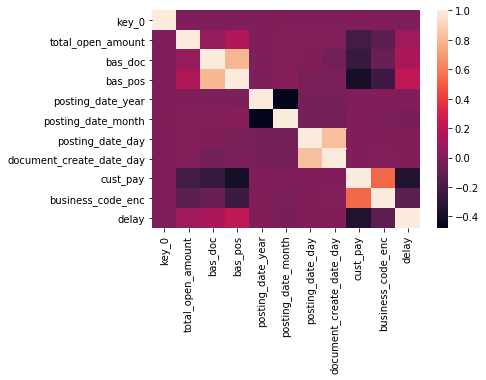

In [59]:
##Plotting the heatmap
sns.heatmap(data.merge(y_train,on = data.index).corr())

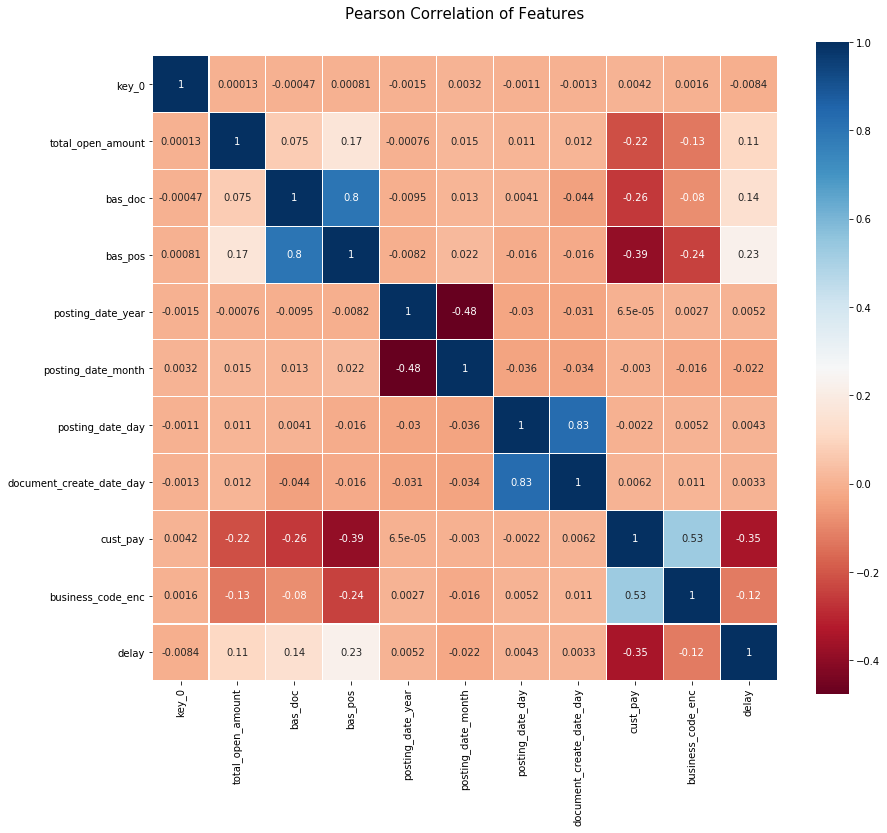

In [60]:
##Plotting the Pearson Correlation Matrix
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.merge(y_train , on = data.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [61]:
##Now from the correlation matrix and heatmap, we can drop following columns.

In [62]:
# ##Dropping all the cloumns from train set having correlation values betweem -0.15 and 0.15
data_train=data.drop(['cust_pay'], axis=1)

In [63]:
# ##Dropping all the cloumns from validation set having correlation values betweem -0.15 and 0.15
data_val=X_vals.drop(['cust_pay'], axis=1)

In [64]:
# ##Dropping all the cloumns from test set having correlation values betweem -0.15 and 0.15
data_test=X_tests.drop(['cust_pay'], axis=1)

In [65]:
##Now 7 cloumns are left.....

In [66]:
data_train.dtypes

total_open_amount           float64
bas_doc                       int64
bas_pos                       int64
posting_date_year             int64
posting_date_month            int64
posting_date_day              int64
document_create_date_day      int64
business_code_enc             int32
dtype: object

## Modelling

### Tree Model

In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [68]:
tmodel=DecisionTreeRegressor()

In [69]:
tmodel.fit(data_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [70]:
##Predicting the validation set
y_predict=tmodel.predict(data_val)

In [71]:
y_predict = y_predict.astype('int64')

In [72]:
y_predict

array([-4,  0,  2, ...,  1, -4, -5], dtype=int64)

In [73]:
mean_absolute_error(y_predict,y_val)

3.682077829346662

In [74]:
np.sqrt(mean_squared_error(y_predict,y_val))

5.229966793371099

### Random Forest Model

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
clf = RandomForestRegressor()

In [77]:
clf.fit(data_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [78]:
ran_predict=clf.predict(data_val)

In [79]:
ran_predict = ran_predict.astype('int64')

In [80]:
ran_predict

array([ 0,  2,  0, ...,  1, -2,  0], dtype=int64)

In [81]:
##Predicting the validation data
mean_absolute_error(ran_predict,y_val)

2.6458407711531597

In [82]:
np.sqrt(mean_squared_error(ran_predict,y_val))

3.766478728675709

### Doing hypermatric tuning of random forest model

In [83]:
clf1 = RandomForestRegressor(max_depth=25,max_leaf_nodes=15)

In [84]:
clf.fit(data_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [85]:
ran_predictt=clf.predict(data_val)

In [86]:
ran_predictt

array([-1.17,  2.31, -0.75, ...,  0.94, -2.44, -0.48])

In [87]:
mean_absolute_error(ran_predictt,y_val)

2.7373153508100847

### Predicting the test data from random forest model

In [88]:
ran_predict1=clf.predict(data_test)

In [89]:
mean_absolute_error(ran_predict1,y_test)

2.7520664057520206

In [90]:
np.sqrt(mean_squared_error(ran_predict1,y_test))

3.8308191461209704

## Predicting Main Test Data

In [91]:
##Seeing the main test data
test_data

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200792734,MDV/ us,NaT,2020.0,2020-03-26,2020-03-26,2020-04-10,USD,3097.00,2020-03-26,NAA8,1.930704e+09,1
8,U001,0200738884,US systems,NaT,2020.0,2020-02-27,2020-02-24,2020-03-13,USD,11622.94,2020-02-27,NAA8,1.930560e+09,1
10,U001,0200762301,C&S WH corporation,NaT,2020.0,2020-03-30,2020-03-29,2020-04-14,USD,9563.15,2020-03-30,NAC6,1.930719e+09,1
15,U001,0200707005,KING S corp,NaT,2020.0,2020-03-21,2020-03-19,2020-04-05,USD,142020.91,2020-03-21,NAA8,1.930672e+09,1
17,U001,0200772670,ASSOCIAT associates,NaT,2020.0,2020-04-03,2020-04-02,2020-04-18,USD,9098.65,2020-04-03,NAU5,1.930732e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48832,U001,0200769623,WAL-MAR corporation,NaT,2020.0,2020-03-05,2020-03-04,2020-03-20,USD,38521.69,2020-03-05,NAH4,1.930598e+09,1
48833,U001,0200799367,MCL llc,NaT,2020.0,2020-03-13,2020-03-12,2020-03-28,USD,38650.12,2020-03-13,NAA8,1.930642e+09,1
48834,U001,0200769623,WAL-MAR corporation,NaT,2020.0,2020-02-28,2020-02-28,2020-03-14,USD,20714.86,2020-02-28,NAH4,1.930581e+09,1
48839,U001,0200793830,M in,NaT,2020.0,2020-05-03,2020-05-03,2020-05-18,USD,16812.00,2020-05-03,NAA8,1.930855e+09,1


In [92]:
##Preprocessing......

In [93]:
test_data.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9715
buisness_year              0
posting_date               0
document_create_date       0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
invoice_id                 0
isOpen                     0
dtype: int64

In [94]:
test_data.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
invoice_id                     float64
isOpen                           int64
dtype: object

In [95]:
X_main_test = test_data.drop(['clear_date'],axis=1)
X_main_test

# ALSO LETS DROP clear date FROM MAIN TEST ITSELF
test_data.drop(['clear_date'], inplace =True,axis=1)

In [96]:
##Feature Engineering......

In [97]:
X_main_test['bas_doc']=(X_main_test['baseline_create_date']-X_main_test['document_create_date']).dt.days
X_main_test['bas_pos']=(X_main_test['baseline_create_date']-X_main_test['posting_date']).dt.days
X_main_test['posting_date_year'] = X_main_test['posting_date'].dt.year
X_main_test['posting_date_month'] = X_main_test['posting_date'].dt.month
X_main_test['posting_date_day'] = X_main_test['posting_date'].dt.day
X_main_test['document_create_date_day'] = X_main_test['document_create_date'].dt.day


In [98]:
cust_pay=LabelEncoder()
cust_pay.fit(X_main_test['cust_payment_terms'])
X_main_test['cust_pay']=cust_pay.transform(X_main_test['cust_payment_terms'])

In [99]:
business_code_enc=LabelEncoder()
business_code_enc.fit(X_main_test['business_code'])

X_main_test['business_code_enc']=business_code_enc.transform(X_main_test['business_code'])

In [100]:
##Selection of features...

In [101]:
X_main_test=X_main_test.drop(['business_code','cust_number','name_customer','posting_date','document_create_date','due_in_date',
                'invoice_currency','buisness_year','baseline_create_date','invoice_id',
                   'business_code','cust_payment_terms','isOpen'], axis=1)

In [102]:
X_main_test=X_main_test.drop(['cust_pay'], axis=1)

In [103]:
X_main_test.columns

Index(['total_open_amount', 'bas_doc', 'bas_pos', 'posting_date_year',
       'posting_date_month', 'posting_date_day', 'document_create_date_day',
       'business_code_enc'],
      dtype='object')

In [104]:
data_train.columns

Index(['total_open_amount', 'bas_doc', 'bas_pos', 'posting_date_year',
       'posting_date_month', 'posting_date_day', 'document_create_date_day',
       'business_code_enc'],
      dtype='object')

In [105]:
##Predicting the output.....

In [106]:
final_prediction=clf.predict(X_main_test)

In [107]:
final_prediction = final_prediction.astype('int64')

In [108]:
final_prediction

array([ 0,  1,  0, ...,  0,  1, -1], dtype=int64)

In [109]:
final_prediction = pd.Series(final_prediction,name='Delay')

In [110]:
##Resetting the index of main test so that we can merge price series with it
test_data.reset_index(drop=True,inplace=True)

In [111]:
##Merging the data and storing it into new dataframe
test_df = test_data.merge(final_prediction , on = test_data.index )
test_df

,key_0,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay
0,0,U001,0200792734,MDV/ us,2020.0,2020-03-26,2020-03-26,2020-04-10,USD,3097.00,2020-03-26,NAA8,1.930704e+09,1,0
1,1,U001,0200738884,US systems,2020.0,2020-02-27,2020-02-24,2020-03-13,USD,11622.94,2020-02-27,NAA8,1.930560e+09,1,1
2,2,U001,0200762301,C&S WH corporation,2020.0,2020-03-30,2020-03-29,2020-04-14,USD,9563.15,2020-03-30,NAC6,1.930719e+09,1,0
3,3,U001,0200707005,KING S corp,2020.0,2020-03-21,2020-03-19,2020-04-05,USD,142020.91,2020-03-21,NAA8,1.930672e+09,1,0
4,4,U001,0200772670,ASSOCIAT associates,2020.0,2020-04-03,2020-04-02,2020-04-18,USD,9098.65,2020-04-03,NAU5,1.930732e+09,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9710,9710,U001,0200769623,WAL-MAR corporation,2020.0,2020-03-05,2020-03-04,2020-03-20,USD,38521.69,2020-03-05,NAH4,1.930598e+09,1,-2
9711,9711,U001,0200799367,MCL llc,2020.0,2020-03-13,2020-03-12,2020-03-28,USD,38650.12,2020-03-13,NAA8,1.930642e+09,1,-2
9712,9712,U001,0200769623,WAL-MAR corporation,2020.0,2020-02-28,2020-02-28,2020-03-14,USD,20714.86,2020-02-28,NAH4,1.930581e+09,1,0
9713,9713,U001,0200793830,M in,2020.0,2020-05-03,2020-05-03,2020-05-18,USD,16812.00,2020-05-03,NAA8,1.930855e+09,1,1


In [112]:
##Using timedelta function to find the clear date from delay and due date
test_df['clear_date']=test_df['due_in_date'] + pd.to_timedelta(test_df['Delay'], unit='d')

In [113]:
test_df.head()

,key_0,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,clear_date
0,0,U001,0200792734,MDV/ us,2020.0,2020-03-26,2020-03-26,2020-04-10,USD,3097.00,2020-03-26,NAA8,1.930704e+09,1,0,2020-04-10
1,1,U001,0200738884,US systems,2020.0,2020-02-27,2020-02-24,2020-03-13,USD,11622.94,2020-02-27,NAA8,1.930560e+09,1,1,2020-03-14
2,2,U001,0200762301,C&S WH corporation,2020.0,2020-03-30,2020-03-29,2020-04-14,USD,9563.15,2020-03-30,NAC6,1.930719e+09,1,0,2020-04-14
3,3,U001,0200707005,KING S corp,2020.0,2020-03-21,2020-03-19,2020-04-05,USD,142020.91,2020-03-21,NAA8,1.930672e+09,1,0,2020-04-05
4,4,U001,0200772670,ASSOCIAT associates,2020.0,2020-04-03,2020-04-02,2020-04-18,USD,9098.65,2020-04-03,NAU5,1.930732e+09,1,0,2020-04-18


## Bucketing

In [114]:
test_df.nunique()

key_0                   9715
business_code              6
cust_number              697
name_customer           1778
buisness_year              1
posting_date              82
document_create_date      87
due_in_date              122
invoice_currency           2
total_open_amount       9057
baseline_create_date      85
cust_payment_terms        47
invoice_id              9715
isOpen                     1
Delay                     19
clear_date               125
dtype: int64

In [115]:
##Making the bin and label to pass into the function 
bins=[-100,-12,-9,-6,-3,-0.5,0.5,3,6,9,12,200]
labels=['More than 12 days earlier due date','Between 10 to 12 days earlier','Between 7 to 9 days earlier',
       'Between 4 to 6 days earlier','Between 1 to 3 days earlier','No delay',
       'Between 1 to 3 days later','Between 4 to 6 days later',
       'Between 7 to 9 days later','Between 10 to 12 days later',
       'More than 12 days after the due date']

In [116]:
##Making the column Delay_bucket which tells in which aging bucket delay falls. 
test_df['Delay_bucket'] = pd.cut(test_df['Delay'],bins,labels=labels)

In [117]:
test_df.head(25)

,key_0,business_code,cust_number,name_customer,buisness_year,posting_date,document_create_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Delay,clear_date,Delay_bucket
0,0,U001,0200792734,MDV/ us,2020.0,2020-03-26,2020-03-26,2020-04-10,USD,3097.00,2020-03-26,NAA8,1.930704e+09,1,0,2020-04-10,No delay
1,1,U001,0200738884,US systems,2020.0,2020-02-27,2020-02-24,2020-03-13,USD,11622.94,2020-02-27,NAA8,1.930560e+09,1,1,2020-03-14,Between 1 to 3 days later
2,2,U001,0200762301,C&S WH corporation,2020.0,2020-03-30,2020-03-29,2020-04-14,USD,9563.15,2020-03-30,NAC6,1.930719e+09,1,0,2020-04-14,No delay
3,3,U001,0200707005,KING S corp,2020.0,2020-03-21,2020-03-19,2020-04-05,USD,142020.91,2020-03-21,NAA8,1.930672e+09,1,0,2020-04-05,No delay
4,4,U001,0200772670,ASSOCIAT associates,2020.0,2020-04-03,2020-04-02,2020-04-18,USD,9098.65,2020-04-03,NAU5,1.930732e+09,1,0,2020-04-18,No delay
5,5,U001,0200705372,FR foundation,2020.0,2020-04-05,2020-04-04,2020-04-20,USD,82661.05,2020-04-05,NAA8,1.930747e+09,1,0,2020-04-20,No delay
6,6,U001,0200769623,WAL-MAR co,2020.0,2020-03-04,2020-03-04,2020-03-19,USD,68525.90,2020-03-04,NAH4,1.930601e+09,1,1,2020-03-20,Between 1 to 3 days later
7,7,U001,0200418007,AM trust,2020.0,2020-04-15,2020-04-13,2020-06-19,USD,2553.60,2020-04-15,NAGD,1.930779e+09,1,0,2020-06-19,No delay
8,8,U001,0200148860,DOLLA systems,2020.0,2020-04-05,2020-04-04,2020-06-09,USD,12821.20,2020-04-05,NAGD,1.930749e+09,1,0,2020-06-09,No delay
9,9,U001,0200020431,DEC corp,2020.0,2020-04-09,2020-04-09,2020-04-24,USD,772.80,2020-04-01,NAM4,1.930768e+09,1,-7,2020-04-17,Between 7 to 9 days earlier
